# Bài 1: Viet chuong trinh cai dat phuong phap bootstrap de xuat ra phan bo lay mau va dai tin cay cua mot thong so thong ke cua bien cua dataset


Head point:  3010434.422660497
Tail point:  3512012.9093397083


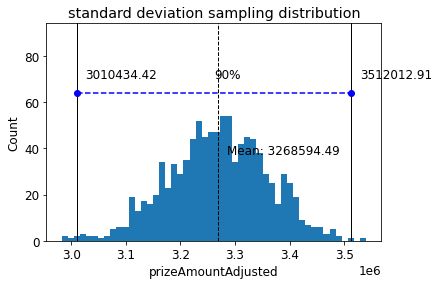

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# read csv
data = pd.read_csv('../State/Nobel/complete.csv')
prizeAmountAdjusted = np.array(data["prizeAmountAdjusted"])
# Std = np.std(prizeAmountAdjusted)

N = len(prizeAmountAdjusted)
n = 200
M = 1000
x = 90
resample = []
def myBootstrap(n, M, x):
    for _ in range(0, M):
        index = np.random.randint(0, N - 1, n)
        sample = prizeAmountAdjusted[index]
        Std = np.std(sample)
        resample.append(Std)

    Max = np.max(resample)
    Min =  np.min(resample)
    Cut_Segment = (Max - Min) * ((100 - x) / 2 / 100)
    Head = Min + Cut_Segment
    Tail = Max - Cut_Segment
    return (resample, Head, Tail)
    
resample, Head, Tail = myBootstrap(n, M, x)
print("Head point: ", Head)
print("Tail point: ", Tail)
counts, bins, bars = plt.hist(resample, bins = 50)
# set up pyplot
plt.rcParams.update({'font.size': 12})
plt.xlabel('prizeAmountAdjusted')
plt.ylabel('Count')
plt.title(f'standard deviation sampling distribution')
# draw line 
plt.axvline(Head, color = 'k', linestyle = 'solid', linewidth = 1)
plt.axvline(Tail, color = 'k', linestyle = 'solid', linewidth = 1)
plt.axvline(np.mean(resample), color = 'k', linestyle = 'dashed', linewidth = 1)
# Statistic 
plt.ylim([0, np.max(counts) + 40])
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(resample) * 1.005, max_ylim * 0.4, 'Mean: {:.2f}'.format(np.mean(resample)))
plt.text(Head * 1.005, max_ylim * 0.75, '{:.2f}'.format(Head))
plt.text(Tail * 1.005, max_ylim * 0.75, '{:.2f}'.format(Tail))
# Interval confidence
x_values = [Head, Tail]
y_values = [np.max(counts) + 10, np.max(counts) + 10]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.text((Head + Tail) / 2, max_ylim * 0.75, f'{x}%')
# Show
plt.show()
# print(len(resample))
# print(np.max(resample))
# print(np.min(resample))
# print((np.max(resample) - np.min(resample)) * ((100 - x) / 2 / 100))


Bai 2: Dựa trên cùng dataset với Câu 1, viết chương trình xuất ra và thuyết trình các thống kê mô tả
quan trọng của các biến, các mối quan hệ giữa các biến đã có và biến tạo thêm (nếu có), quy
luật tiềm ẩn có thể suy diễn từ dataset nhờ các công cụ trực quan hoá dữ liệu (ví dụ:
distribution plot, heat/cluster map, linear model plot,…).

KeyError: 'species'

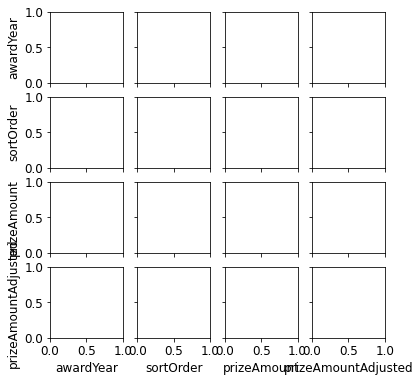

In [139]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../State/Nobel/complete.csv')
#data = sns.load_dataset('../State/Nobel/complete.csv')
sns.pairplot(data, hue='species', height=1.5)
